In [1]:
import pandas as pd

In [2]:
sales_df = pd.read_csv("./math-for-mlv1/linear-regression/Advertising.csv")

In [3]:
sales_df.head(5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sales_df = sales_df.drop("Unnamed: 0", axis = 1)

In [5]:
sales_df.head(25)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Are sales increasing by more ads in TV? Sales and TV ad are both numerical. So use scatter plot

In [34]:
import matplotlib.pyplot as plt

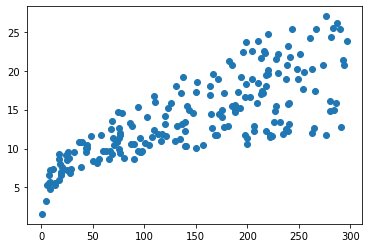

In [35]:
import seaborn as sn
plt.scatter(sales_df.TV, sales_df.Sales );

### SPlit date set into train and test

In [36]:
Y = sales_df.Sales
X = pd.DataFrame(sales_df.TV) # X will have multiple variables. Start with TV for now


In [39]:
Y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [40]:
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, \
y_train, y_test=train_test_split( X, Y, train_size = 0.8 )

In [43]:
X_train.shape

(160, 1)

In [44]:
X_test.shape


(40, 1)

In [45]:
X_train, X_test, \
y_train, y_test=train_test_split( X, Y, train_size = 0.8, random_state = 100 )

In [46]:
X_train.shape


(160, 1)

In [47]:
X_test.shape

(40, 1)

## Build a model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lreg_v1 = LinearRegression()
lreg_v1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find the intercept and slope (coefficient)

In [50]:
lreg_v1.intercept_

7.113008222196275

In [51]:
lreg_v1.coef_

array([0.04610976])

#### From above, we can deduce that FUnction will be 
##### sales = 7.11 + 0.0461 (TV) + Error.

### NOW,  Predict on Test Set
#### Create a table with actual y_test and predicted values out of the function i.e. y_pred and then the difference

In [52]:
y_pred = lreg_v1.predict(X_test)

In [53]:
y_df = pd.DataFrame( {"actual": y_test, "predicted": y_pred, "residual": y_test - y_pred} )

In [54]:
y_df[0:5]


,actual,predicted,residual
126,6.6,7.472664,-0.872664
104,20.7,18.096352,2.603648
99,17.2,13.347047,3.852953
92,19.4,17.151102,2.248898
111,21.8,18.257736,3.542264


In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse_v1 = mean_squared_error( y_df.actual, y_df.predicted)

In [57]:
import numpy as np

In [58]:
np.sqrt(mse_v1)

3.1124057492381794

### This means that: If model predicts that sales will be some number X, then the actual sales would be (X-3.11) to (X+3.11)

### For better predictability, use TV, radio and newspaper

In [59]:
Y = sales_df.Sales
X = sales_df[['TV', 'Radio', 'Newspaper']] # X will have multiple variables. Start with TV for now

In [60]:
Y[0:5]


0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [61]:
X[0:5]

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [62]:
X_train.shape

(160, 1)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, \
y_train, y_test=train_test_split( X, Y, train_size = 0.8 )

In [65]:
lreg_v1 = LinearRegression()
lreg_v1.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
X_train.shape

(160, 3)

In [67]:
X_test.shape

(40, 3)

In [68]:
lreg_v1 = LinearRegression()
lreg_v1.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lreg_v1.intercept_

2.754487626551356

In [70]:
lreg_v1.coef_

array([0.04590515, 0.18719772, 0.00039518])

In [71]:
y_pred = lreg_v1.predict(X_test)

In [72]:
y_df = pd.DataFrame( {"actual": y_test, "predicted": y_pred, "residual": y_test - y_pred} )

In [73]:
y_df[0:5]

,actual,predicted,residual
8,4.8,3.542782,1.257218
22,5.6,6.356480,-0.756480
137,20.8,20.752334,0.047666
151,11.6,9.900717,1.699283
83,13.6,14.238767,-0.638767


In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
mse_v1 = mean_squared_error( y_df.actual, y_df.predicted)

In [76]:
import numpy as np

In [77]:
np.sqrt(mse_v1)


1.2895574637510776

## Calculate R-squared


In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_df.actual, y_df.predicted )

0.9450542187303593

#### This means y_df.predicted is 94% accurate. 
#### WHat about remaining 6%?
#### This maybe because of other factors apart from TV, radio and newspapers.


## Create an interaction feature with TV and radio

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
X_train['TV_Radio'] = X_train['TV'] * X_train['Radio']

In [82]:
X_test['TV_Radio'] = X_test['TV'] * X_test['Radio']

In [83]:
lreg_v3 = LinearRegression()

In [84]:
lreg_v3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
lreg_v3.intercept_

6.889371741087894

In [86]:
lreg_v3.coef_

array([0.01765468, 0.01802695, 0.00323805, 0.00114181])

### IMPORTANT: In above equation, lreg_v3.coef_, we have 4 variables....i.e. for dimensional space. 
### They represent:
#### 1. TV
#### 2. Radio
#### 3. Newspaper
#### 4. TV_RAdio (that we added now)

In [95]:
y_pred = lreg_v3.predict(X_test)

In [96]:
y_df = pd.DataFrame( {"actual": y_test, "predicted": y_pred, "residual": y_test - y_pred} )

In [97]:
y_df[0:5]

,actual,predicted,residual
8,4.8,7.102918,-2.302918
22,5.6,7.809292,-2.209292
137,20.8,21.467360,-0.667360
151,11.6,10.495240,1.104760
83,13.6,12.489857,1.110143


In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
mse_v3 = mean_squared_error( y_df.actual, y_df.predicted)

In [100]:
import numpy as np

In [101]:
np.sqrt(mse_v3)

0.8655487440939638

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y_df.actual, y_df.predicted )

0.9752465341466325

##
### We have built a model that is 97% accurate.
### Now, how do we deploy it?
    

In [104]:
from sklearn.externals import joblib

In [105]:
joblib.dump(lreg_v3, "sales.model")

['sales.model']

### Sales.model is created in the present working directory. It stores the model in serial (pickle) format
### This has to be desriralized and used in the prediction system
### Prediction system will be written in a different python file - "Sales Prediction System 1.0";  it will load this sales.model and use it to predict.